# Kata de graphes

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Graphe #1

Réaliser un graphique avec deux axes. L'axe des abscisses va de 0 à 50 et s'intitule "Axe des x". L'axe des ordonnées s'intitule "Axe des y".
Tracer la droite d'équation : x = 3y. Avec x allant de 0 à 50.
Le graphe possède le titre suivant "Tracer une droite" et la droite est de couleur rouge.

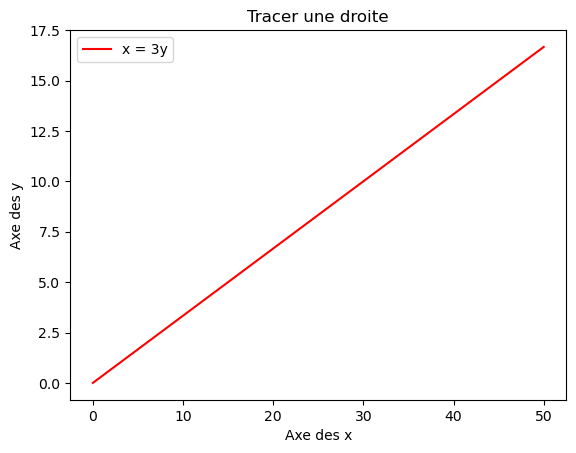

In [28]:
# Création des axes X et y
y = np.linspace(0, 50/3)
x = 3*y


plt.plot(x, y, color="red", label='x = 3y') #création du graphe et choix de la couleur
plt.xlabel('Axe des x') #Titre de l'axe x
plt.ylabel('Axe des y') #Titre de l'axe y
plt.title('Tracer une droite') #Titre du graphe
plt.legend() #légende

plt.show() #montrer le graphe

### Graphe #2

Télécharger le fichier des ventes 2020 d'une entreprise de cosmétiques.
En premier lieu, nous souhaitons un graphe qui donne la courbe du profit total réalisé chaque mois.

In [70]:
data = ('company_sales_data.csv')
df = pd.read_csv(data, header = 0, delimiter = ',')

display(df)
df.shape

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


(12, 9)

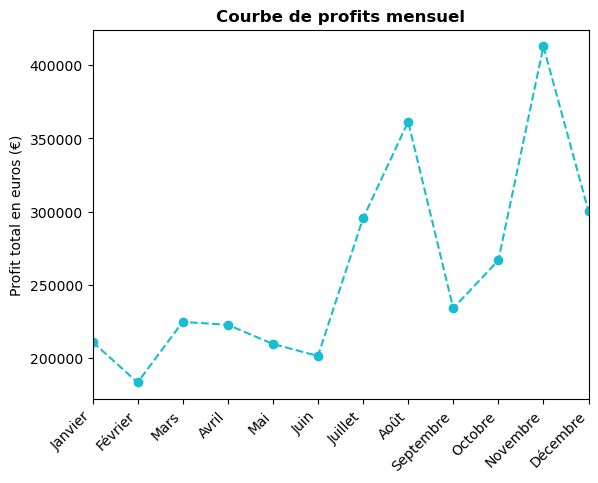

In [82]:
# Liste de noms de mois en français
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# tracé de la courbe avec les noms de mois en abscisse
plt.plot(df['month_number'], df['total_profit'], marker='o', linestyle='--', color='C9')
plt.xlim([1, 12])
# remplacement des valeurs de 1 à 12 par les noms de mois en français + rotation car les noms se chevauchent
plt.xticks(range(1, 13), months, rotation=45, ha='right')  
plt.ylabel('Profit total en euros (€)')
plt.title('Courbe de profits mensuel', fontweight='bold')

plt.show()

### Graphe #3

Ensuite, nous souhaitons un graphe qui donne la courbe de profit pour chaque produit, en fonction du temps.
Chaque courbe aura une couleur différente et nous souhaitons une légende qui indique quelle couleur correspond à quel produit.

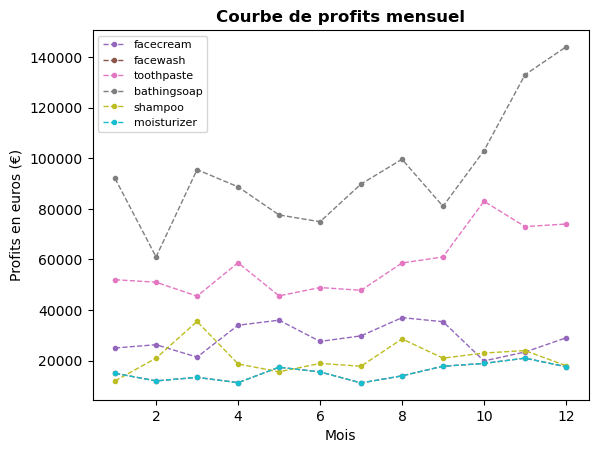

In [100]:
style = dict(linewidth=1, linestyle="--", marker=".") #dictionnaire de style défini en amont

#Option 1
#plt.plot(df['month_number'], df['facecream'] * 10, label='facecream', color='C9', **style)
#plt.plot(df['month_number'], df['facewash'] * 10, label='facewash', color='C8', **style)
#plt.plot(df['month_number'], df['toothpaste'] * 10, label='toothpaste', color='C7', **style)
#plt.plot(df['month_number'], df['bathingsoap'] * 10, label='bathingsoap', color='C6', **style)
#plt.plot(df['month_number'], df['shampoo'] * 10, label='shampoo', color='C5', **style)
#plt.plot(df['month_number'], df['moisturizer'] * 10, label='moisturizer', color='C4', **style)

#option 2 (simplifiée)
# liste des noms de produits
products = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']

# tracer les courbes pour chaque produit grâce à une boucle
for i, product in enumerate(products):
    plt.plot(df['month_number'], df[product] * 10, label=product, color=f"C{i+4}", **style)

plt.xlabel('Mois')
plt.ylabel('Profits en euros (€)')
plt.title('Courbe de profits mensuel', fontweight='bold')
plt.legend(fontsize=8)

plt.show()

### Graphe #4

Nous souhaitons un graphe qui compare, chaque mois, le nombre d'unités vendus pour chaque produit. A vous de choisir la meilleure représentation pour connaître le produit le plus vendu par mois.

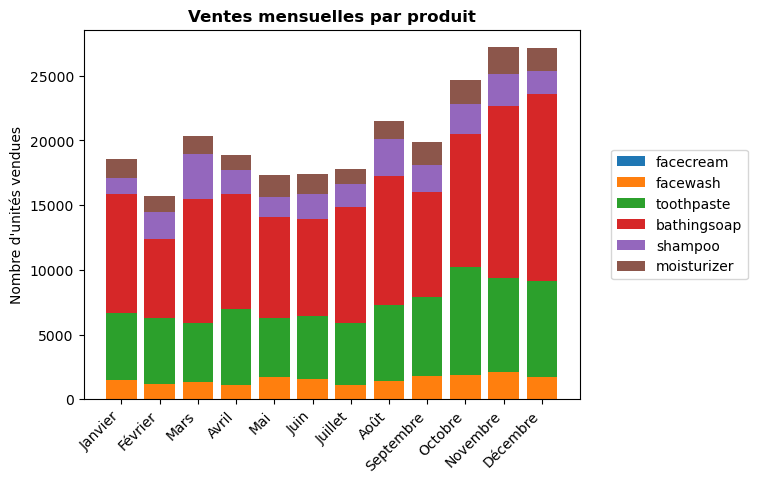

In [116]:
# Préparer les données pour le graphique
month_number = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
products = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']
sales_data = [df[product].tolist() for product in products]
bottom = [0] * len(df)

# Créer le graphique de type barres empilées
fig, ax = plt.subplots()
ax.bar(df['month_number'], sales_data[0], label=products[0])
for i in range(1, len(sales_data)):
    ax.bar(df['month_number'], sales_data[i], bottom=bottom, label=products[i])
    bottom = [bottom[j] + sales_data[i][j] for j in range(len(df))]
    
plt.xticks(range(1, 13), months, rotation=45, ha='right')  
ax.set_ylabel('Nombre d\'unités vendues')
ax.set_title('Ventes mensuelles par produit', fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

### Graphe 5

Nous souhaitons un graphe qui donne la contribution de chaque produit dans le profit total (sur l'année étudiée). Merci d'ajouter le pourcentage pour chaque produit.

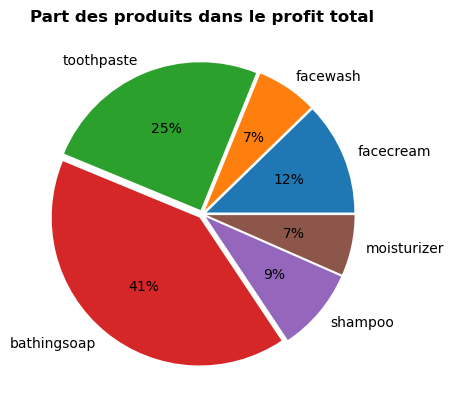

In [118]:
#Calculer le profit total de chaque produit
facecream = df['facecream'].sum()
facewash = df['facewash'].sum()
toothpaste = df['toothpaste'].sum()
bathingsoap = df['bathingsoap'].sum()
shampoo = df['shampoo'].sum()
moisturizer = df['moisturizer'].sum()

#Modéliser le camembert
plt.pie([facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer], labels=["facecream","facewash","toothpaste","bathingsoap","shampoo","moisturizer"], autopct="%1.0f%%", explode=(0.03,0.03,0.03,0.03,0.03,0.03))
plt.title("Part des produits dans le profit total", fontweight='bold')

plt.show()

### Graphe #6

Maintenant, on va changer de source de données. Et on va revenir au projet d'hier. Demande-toi si hier, tu as pensé à faire des graphes. Si oui, c'est top, ça montre que c'est intuitif de devoir visualiser certaines données. Si non, c'est normal, on n'avait pas encore vu ça dans les ressources. Sache qu'à partir de maintenant, tout va te paraître plus facile car tu penseras toujours faire des représentations graphiques.

Reprend donc les 3 fichiers csv qui donnent les ventes, la liste des clients et la liste des produits.

D'abord, nous souhaitons avoir un graphe pie chart qui donne la répartition des produits par catégorie. Merci d'indiquer le pourcentage par produit (nb de produits de telle catégorie / nb de produits totaux).